In [1]:
import cv2
from matplotlib import pyplot as plt

def cv_show(name,img):
  cv2_imshow(name,img)

def plt_show0(img):
  b,g,r = cv2.split(img)
  img = cv2.merge([r,g,b])
  plt.imshow(img)
  plt.show
#显示灰度图像
def plt_show(img):
  plt.imshow(img,cmap="gray")
  plt.show

In [2]:
#加载图片
rawimage = cv2.imread("image1.jpg")

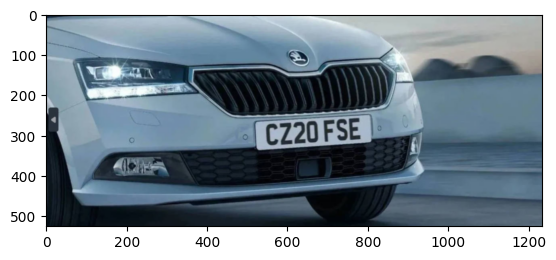

In [3]:
#高斯去噪
image = cv2.GaussianBlur(rawimage,(3,3),0)
plt_show0(image)

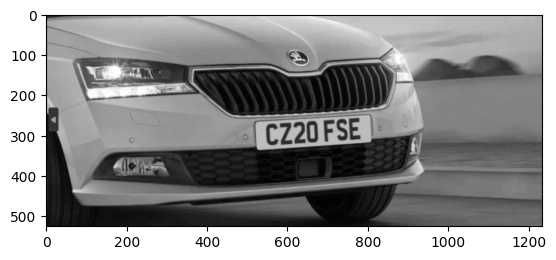

In [4]:
#灰度处理
gray_image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
plt_show(gray_image)

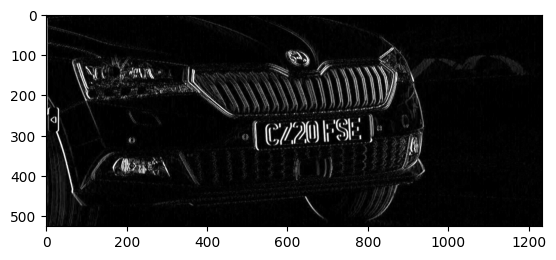

In [5]:
# 算子
Sobel_x = cv2.Sobel(gray_image,cv2.CV_16S,1,0)
absX = cv2.convertScaleAbs(Sobel_x)# 转回uint8
image = absX
plt_show(image)

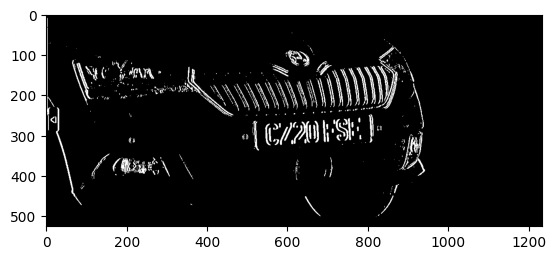

In [6]:
#自适应阈值处理
ret,image = cv2.threshold(image,0,255,cv2.THRESH_OTSU)
plt_show(image)

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


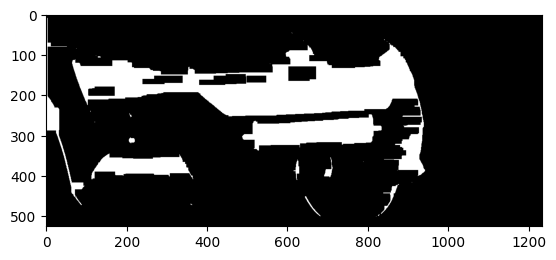

In [7]:
# 闭运算，白色部分来组成整体
kernelX = cv2.getStructuringElement(cv2.MORPH_RECT,(17,5))
print(kernelX)
image = cv2.morphologyEx(image,cv2.MORPH_CLOSE,kernelX,iterations=3)
plt_show(image)

In [8]:
#去除小白点
kernelX = cv2.getStructuringElement(cv2.MORPH_RECT,(20,1))
kernelY = cv2.getStructuringElement(cv2.MORPH_RECT,(1,19))
#膨胀，腐蚀
image = cv2.dilate(image,kernelX)
image = cv2.erode(image,kernelY)
#腐蚀，膨胀
image = cv2.erode(image,kernelX)
image = cv2.dilate(image,kernelY)

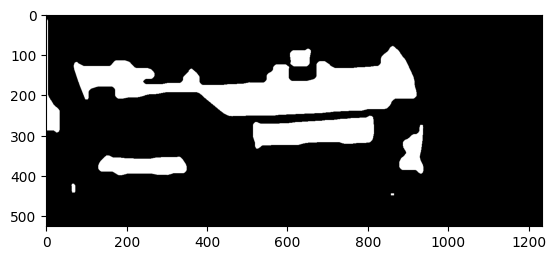

In [9]:
# 中值滤波去除噪点
image = cv2.medianBlur(image,15)
plt_show(image)

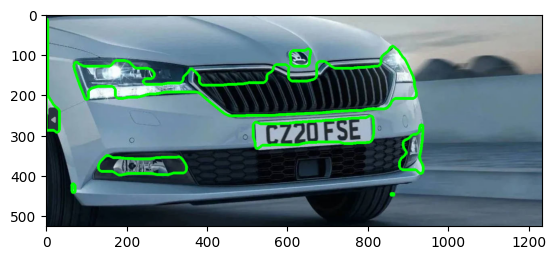

In [10]:
#轮廓检测
#cv2.RETR_EXTERNAL  表示只检测外轮廓
#cv2.CHAIN_APPROX_SIMPLE 压缩水平方向，垂直方向，对角线方向的元素，只保留该方向的终点坐标，如一个矩形轮廓只需要四个点来保存轮廓信息
contours,hierarchay = cv2.findContours(image,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
#绘制轮廓
image1 = rawimage.copy()
cv2.drawContours(image1,contours,-1,(0,255,0),5)
plt_show0(image1)

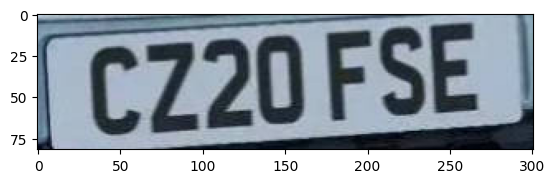

In [11]:
#筛选出车牌位置轮廓
#车牌的长宽比3：1到4；1的一个判断
for item in contours:
  rect = cv2.boundingRect(item)
  x = rect[0]
  y = rect[1]
  weight = rect[2]
  height = rect[3]
  #440*440mm
  if (weight>(height*3)) and (weight < (height*4)):
    image = rawimage[y:y+height,x:x+weight]

    plt_show0(image)